In [60]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import yfinance as yf 
import talib as ta 
from talib import MA_Type

In [98]:
df = yf.download('BTC-USD', start='2015-01-01', end= '2017-12-30', interval= '1mo')

[*********************100%***********************]  1 of 1 completed


In [99]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,171.509995,217.464005,217.464005,1098811912
2015-02-01,216.867004,265.610992,212.014999,254.263000,254.263000,711518700
2015-03-01,254.283005,300.044006,236.514999,244.223999,244.223999,959098300
2015-04-01,244.223007,261.798004,214.873993,236.145004,236.145004,672338700
2015-05-01,235.938995,247.804001,228.572998,230.190002,230.190002,568122600
2015-06-01,230.233002,267.867004,221.296005,263.071991,263.071991,629780200
2015-07-01,263.345001,314.394012,253.505005,284.649994,284.649994,999892200
2015-08-01,284.686005,285.714996,199.567001,230.056000,230.056000,905192300
2015-09-01,230.255997,259.182007,225.117004,236.059998,236.059998,603623900


In [100]:
df.dropna(inplace= True)

In [115]:
upperband, middleband, lowerband = ta.BBANDS(df['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)


In [116]:
BBANDS = pd.DataFrame([upperband, middleband, lowerband])

In [117]:
BBANDS = BBANDS.T

In [118]:
BBANDS.rename(columns={0:'upperband',1:'middleband', 2:'lowerband'}, 
              inplace= True)

In [119]:
BBANDS.columns

Index(['upperband', 'middleband', 'lowerband'], dtype='object')

In [126]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,upperband,middleband,lowerband,SMA
Date,,,,,,,,,,
2015-01-01,320.434998,320.434998,171.509995,217.464005,217.464005,1098811912,NaN,NaN,NaN,NaN
2015-02-01,216.867004,265.610992,212.014999,254.263000,254.263000,711518700,NaN,NaN,NaN,NaN
2015-03-01,254.283005,300.044006,236.514999,244.223999,244.223999,959098300,NaN,NaN,NaN,NaN
2015-04-01,244.223007,261.798004,214.873993,236.145004,236.145004,672338700,NaN,NaN,NaN,NaN
2015-05-01,235.938995,247.804001,228.572998,230.190002,230.190002,568122600,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

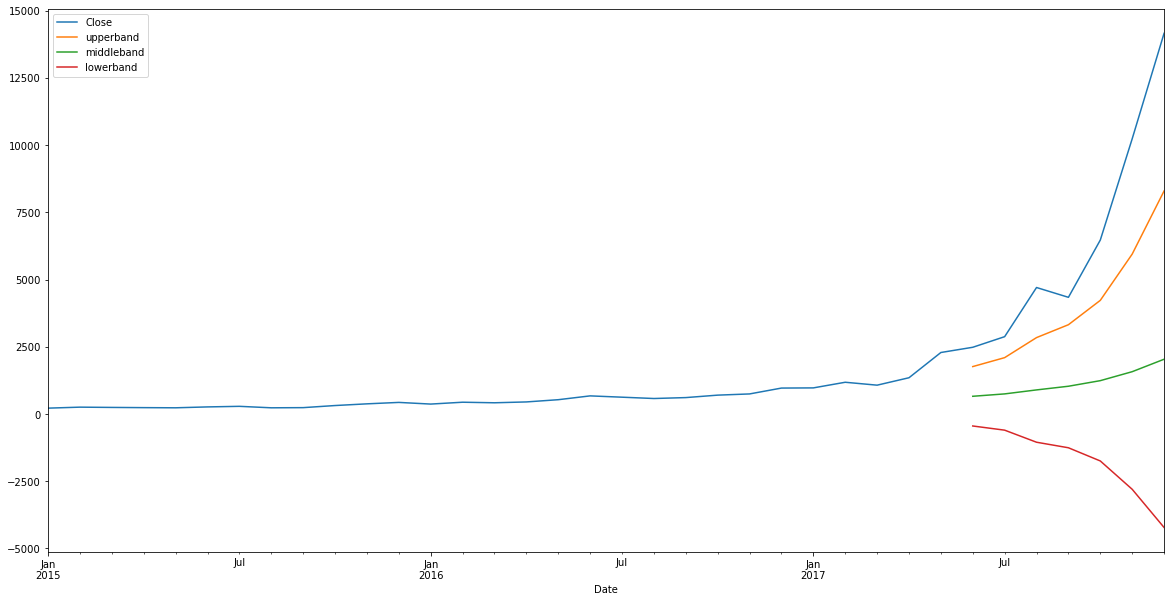

In [122]:
df[['Close', 'upperband', 'middleband', 'lowerband']].plot(figsize= (20,10))

In [124]:
df['SMA'] = ta.SMA(df['Close'], timeperiod = 20 )
df.head(5)

,Open,High,Low,Close,Adj Close,Volume,upperband,middleband,lowerband,SMA
Date,,,,,,,,,,
2015-01-01,320.434998,320.434998,171.509995,217.464005,217.464005,1098811912,NaN,NaN,NaN,NaN
2015-02-01,216.867004,265.610992,212.014999,254.263000,254.263000,711518700,NaN,NaN,NaN,NaN
2015-03-01,254.283005,300.044006,236.514999,244.223999,244.223999,959098300,NaN,NaN,NaN,NaN
2015-04-01,244.223007,261.798004,214.873993,236.145004,236.145004,672338700,NaN,NaN,NaN,NaN
2015-05-01,235.938995,247.804001,228.572998,230.190002,230.190002,568122600,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

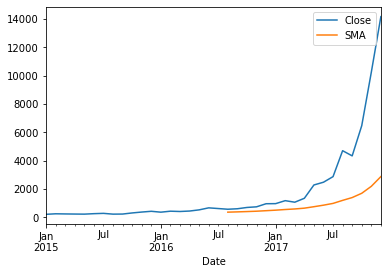

In [125]:
df[['Close', 'SMA']].plot()